In [1]:
## XGBoost 算法，极端梯度提升（eXtreme Gradient Boosting，XGBoost
#1.读取数据 
import numpy as np # 导入 NumPy库
import pandas as pd # 导入 Pandas库
df = pd.read_csv("G:/儿童骨密度/DATA/Raw data/p_TP1NP_2.csv")  # 读取文件
df.head() # 显示前 5行数据

,Gender,Age,Weight,Height,BMI,Total BMD,Lumbar spine BMD,TBLH BMD,TBLH BMD Z -score,Total fat percentage,...,LDL,TC,FBG,TyG index,HOMA-IR,HbA1c,Spexin,FGF23,"1,25(OH)2D",target
0,0,11,49.0,162.9,18.47,0.97,0.74,0.88,1.07,28.4,...,2.44,2.87,5.20,8.72,2.35,5.27,0.52,46.11,65.30,0
1,0,10,41.3,161.5,15.83,0.90,0.64,0.80,1.42,28.6,...,1.40,2.68,5.14,8.23,3.05,4.59,0.52,32.61,57.26,0
2,0,11,53.0,161.1,20.42,0.97,0.72,0.85,1.92,35.7,...,2.18,3.86,4.56,8.34,2.15,4.25,0.68,69.63,65.90,1
3,1,11,50.5,161.0,19.48,0.75,0.79,0.70,1.35,26.0,...,2.31,2.72,4.87,8.53,2.87,5.16,0.55,44.47,92.20,1
4,0,11,47.2,159.4,18.58,1.05,0.82,0.92,0.82,24.0,...,2.30,3.29,5.33,8.63,2.15,4.22,0.63,39.76,25.60,0


In [2]:
df.target.value_counts() # 输出分类值 , 及各个类别数目

0    166
1    166
Name: target, dtype: int64

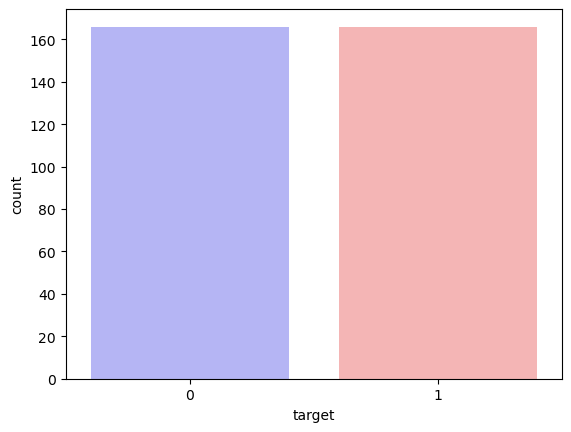

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns #导入seaborn画图工具箱
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [4]:
#df = df.drop(columns = ['ID'])#去除ID列
df.head()

,Gender,Age,Weight,Height,BMI,Total BMD,Lumbar spine BMD,TBLH BMD,TBLH BMD Z -score,Total fat percentage,...,LDL,TC,FBG,TyG index,HOMA-IR,HbA1c,Spexin,FGF23,"1,25(OH)2D",target
0,0,11,49.0,162.9,18.47,0.97,0.74,0.88,1.07,28.4,...,2.44,2.87,5.20,8.72,2.35,5.27,0.52,46.11,65.30,0
1,0,10,41.3,161.5,15.83,0.90,0.64,0.80,1.42,28.6,...,1.40,2.68,5.14,8.23,3.05,4.59,0.52,32.61,57.26,0
2,0,11,53.0,161.1,20.42,0.97,0.72,0.85,1.92,35.7,...,2.18,3.86,4.56,8.34,2.15,4.25,0.68,69.63,65.90,1
3,1,11,50.5,161.0,19.48,0.75,0.79,0.70,1.35,26.0,...,2.31,2.72,4.87,8.53,2.87,5.16,0.55,44.47,92.20,1
4,0,11,47.2,159.4,18.58,1.05,0.82,0.92,0.82,24.0,...,2.30,3.29,5.33,8.63,2.15,4.22,0.63,39.76,25.60,0


In [5]:
#2.构建特征集和标签集
X = df.drop(['target'], axis = 1) # 构建特征集
y = df.target.values # 构建标签集
y = y.reshape(-1, 1) # -1是相对索引 , 等价于 len(y)
print("张量 X的形状 :", X.shape)
print("张量 y的形状 :", y.shape)

张量 X的形状 : (332, 22)
张量 y的形状 : (332, 1)


In [6]:
#3.拆分数据集
#按照 80%/20% 的比例准备训练集和测试集，3000
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=45)#46

In [7]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler() 
X_train = scaler.ﬁt_transform(X_train) 
X_test = scaler.transform(X_test) 

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
XGBoost 混淆矩阵:
 [[34  6]
 [ 0 27]]


<Axes: title={'center': 'XGBoost(Best Score) Confusion Matrix'}>

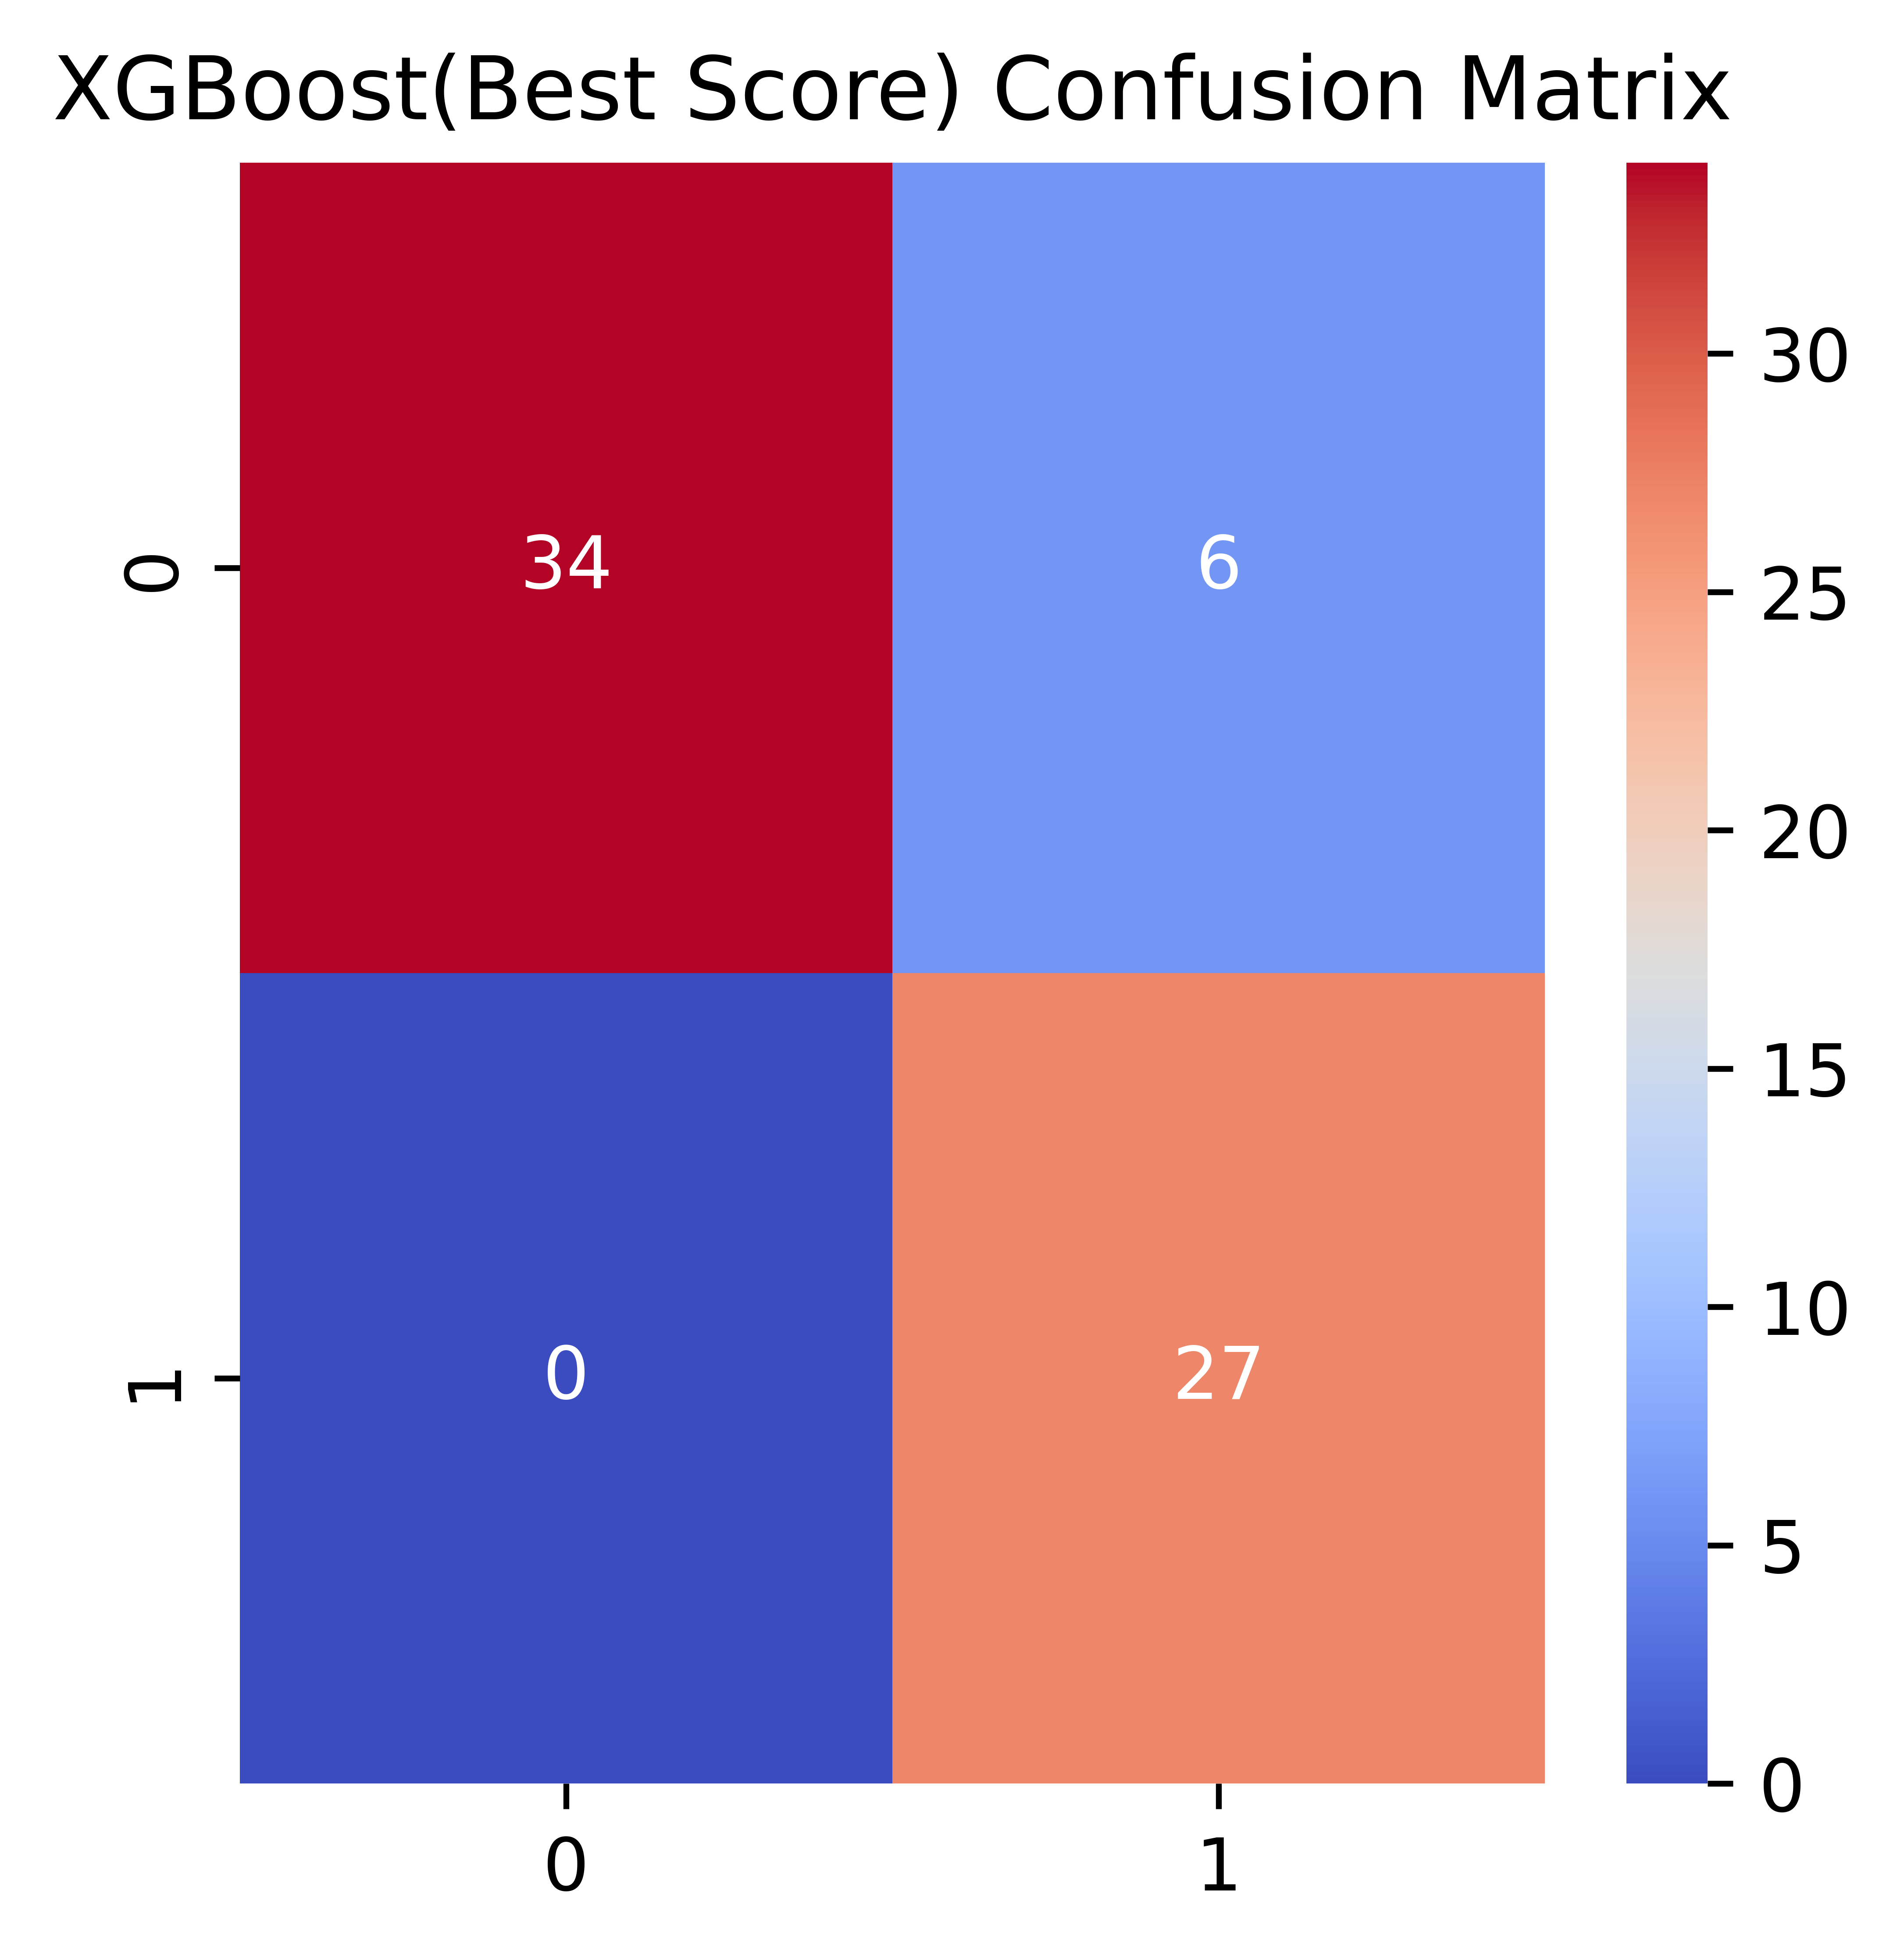

In [10]:
# XGBoost 算法，极端梯度提升（eXtreme Gradient Boosting，XGBoost
import random
from xgboost import XGBClassifier # 导入XGB分类器
from sklearn.model_selection import GridSearchCV # 导入网格搜索工具
from sklearn.metrics import (f1_score, confusion_matrix) # 导入评估指标
from sklearn.metrics import classiﬁcation_report # 导入分类报告
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
xgb = XGBClassifier() 
xgb_param_grid = {'min_child_weight': [1, 5, 10],
                  'gamma': [0.5, 1, 1.5, 2, 5],
                  'subsample': [0.6, 0.8, 1.0],
                  'colsample_bytree': [0.6, 0.8, 1.0],
                  'max_depth': [3, 4, 5]}
xgb_gs = GridSearchCV(xgb,param_grid = xgb_param_grid,  
                     scoring="f1", n_jobs= 10, verbose = 1)
xgb_gs.fit(X_train,y_train)
xgb_y_pred = xgb_gs.predict(X_test) 
xgb_y_prob = xgb_gs.predict_proba(X_test)[:,1]

cm_xgbgs = confusion_matrix(y_test, xgb_y_pred) 
xgb_gs = xgb_gs.best_estimator_ 
xgb_acc = xgb_gs.score(X_test, y_test)*100
cm_dot_four = confusion_matrix(xgb_y_prob >= 0.55, xgb_y_pred)
plt.figure(figsize=(4, 4), dpi=1200)#设置图片大小，像素
print('XGBoost 混淆矩阵:\n', cm_dot_four)
plt.title("XGBoost(Best Score) Confusion Matrix")
sns.heatmap(cm_dot_four, annot=True, cmap="coolwarm", fmt="d", cbar="TRUE")

In [11]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = xgb_y_prob
y_true = y_test

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Original ROC area: 0.688
Bootstrap #1 ROC area: 0.600
Bootstrap #2 ROC area: 0.761
Bootstrap #3 ROC area: 0.725
Bootstrap #4 ROC area: 0.593
Bootstrap #5 ROC area: 0.805
Bootstrap #6 ROC area: 0.730
Bootstrap #7 ROC area: 0.750
Bootstrap #8 ROC area: 0.658
Bootstrap #9 ROC area: 0.576
Bootstrap #10 ROC area: 0.701
Bootstrap #11 ROC area: 0.673
Bootstrap #12 ROC area: 0.640
Bootstrap #13 ROC area: 0.721
Bootstrap #14 ROC area: 0.656
Bootstrap #15 ROC area: 0.611
Bootstrap #16 ROC area: 0.664
Bootstrap #17 ROC area: 0.694
Bootstrap #18 ROC area: 0.752
Bootstrap #19 ROC area: 0.689
Bootstrap #20 ROC area: 0.579
Bootstrap #21 ROC area: 0.669
Bootstrap #22 ROC area: 0.676
Bootstrap #23 ROC area: 0.605
Bootstrap #24 ROC area: 0.812
Bootstrap #25 ROC area: 0.683
Bootstrap #26 ROC area: 0.653
Bootstrap #27 ROC area: 0.771
Bootstrap #28 ROC area: 0.754
Bootstrap #29 ROC area: 0.705
Bootstrap #30 ROC area: 0.585
Bootstrap #31 ROC area: 0.787
Bootstrap #32 ROC area: 0.648
Bootstrap #33 ROC area: 

Bootstrap #430 ROC area: 0.653
Bootstrap #431 ROC area: 0.727
Bootstrap #432 ROC area: 0.655
Bootstrap #433 ROC area: 0.681
Bootstrap #434 ROC area: 0.811
Bootstrap #435 ROC area: 0.698
Bootstrap #436 ROC area: 0.741
Bootstrap #437 ROC area: 0.633
Bootstrap #438 ROC area: 0.625
Bootstrap #439 ROC area: 0.635
Bootstrap #440 ROC area: 0.714
Bootstrap #441 ROC area: 0.687
Bootstrap #442 ROC area: 0.755
Bootstrap #443 ROC area: 0.690
Bootstrap #444 ROC area: 0.748
Bootstrap #445 ROC area: 0.832
Bootstrap #446 ROC area: 0.839
Bootstrap #447 ROC area: 0.692
Bootstrap #448 ROC area: 0.659
Bootstrap #449 ROC area: 0.741
Bootstrap #450 ROC area: 0.690
Bootstrap #451 ROC area: 0.610
Bootstrap #452 ROC area: 0.611
Bootstrap #453 ROC area: 0.672
Bootstrap #454 ROC area: 0.796
Bootstrap #455 ROC area: 0.766
Bootstrap #456 ROC area: 0.759
Bootstrap #457 ROC area: 0.814
Bootstrap #458 ROC area: 0.700
Bootstrap #459 ROC area: 0.560
Bootstrap #460 ROC area: 0.787
Bootstrap #461 ROC area: 0.712
Bootstra

Bootstrap #859 ROC area: 0.670
Bootstrap #860 ROC area: 0.706
Bootstrap #861 ROC area: 0.728
Bootstrap #862 ROC area: 0.723
Bootstrap #863 ROC area: 0.619
Bootstrap #864 ROC area: 0.679
Bootstrap #865 ROC area: 0.699
Bootstrap #866 ROC area: 0.747
Bootstrap #867 ROC area: 0.768
Bootstrap #868 ROC area: 0.624
Bootstrap #869 ROC area: 0.790
Bootstrap #870 ROC area: 0.666
Bootstrap #871 ROC area: 0.790
Bootstrap #872 ROC area: 0.662
Bootstrap #873 ROC area: 0.642
Bootstrap #874 ROC area: 0.741
Bootstrap #875 ROC area: 0.718
Bootstrap #876 ROC area: 0.667
Bootstrap #877 ROC area: 0.599
Bootstrap #878 ROC area: 0.665
Bootstrap #879 ROC area: 0.710
Bootstrap #880 ROC area: 0.678
Bootstrap #881 ROC area: 0.772
Bootstrap #882 ROC area: 0.700
Bootstrap #883 ROC area: 0.512
Bootstrap #884 ROC area: 0.738
Bootstrap #885 ROC area: 0.648
Bootstrap #886 ROC area: 0.813
Bootstrap #887 ROC area: 0.641
Bootstrap #888 ROC area: 0.635
Bootstrap #889 ROC area: 0.671
Bootstrap #890 ROC area: 0.788
Bootstra

In [12]:
#计算AUC95% CI
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("AUC 95%CI:[{:0.3f}-{:0.3}]".format(
    confidence_lower, confidence_upper))

AUC 95%CI:[0.574-0.798]


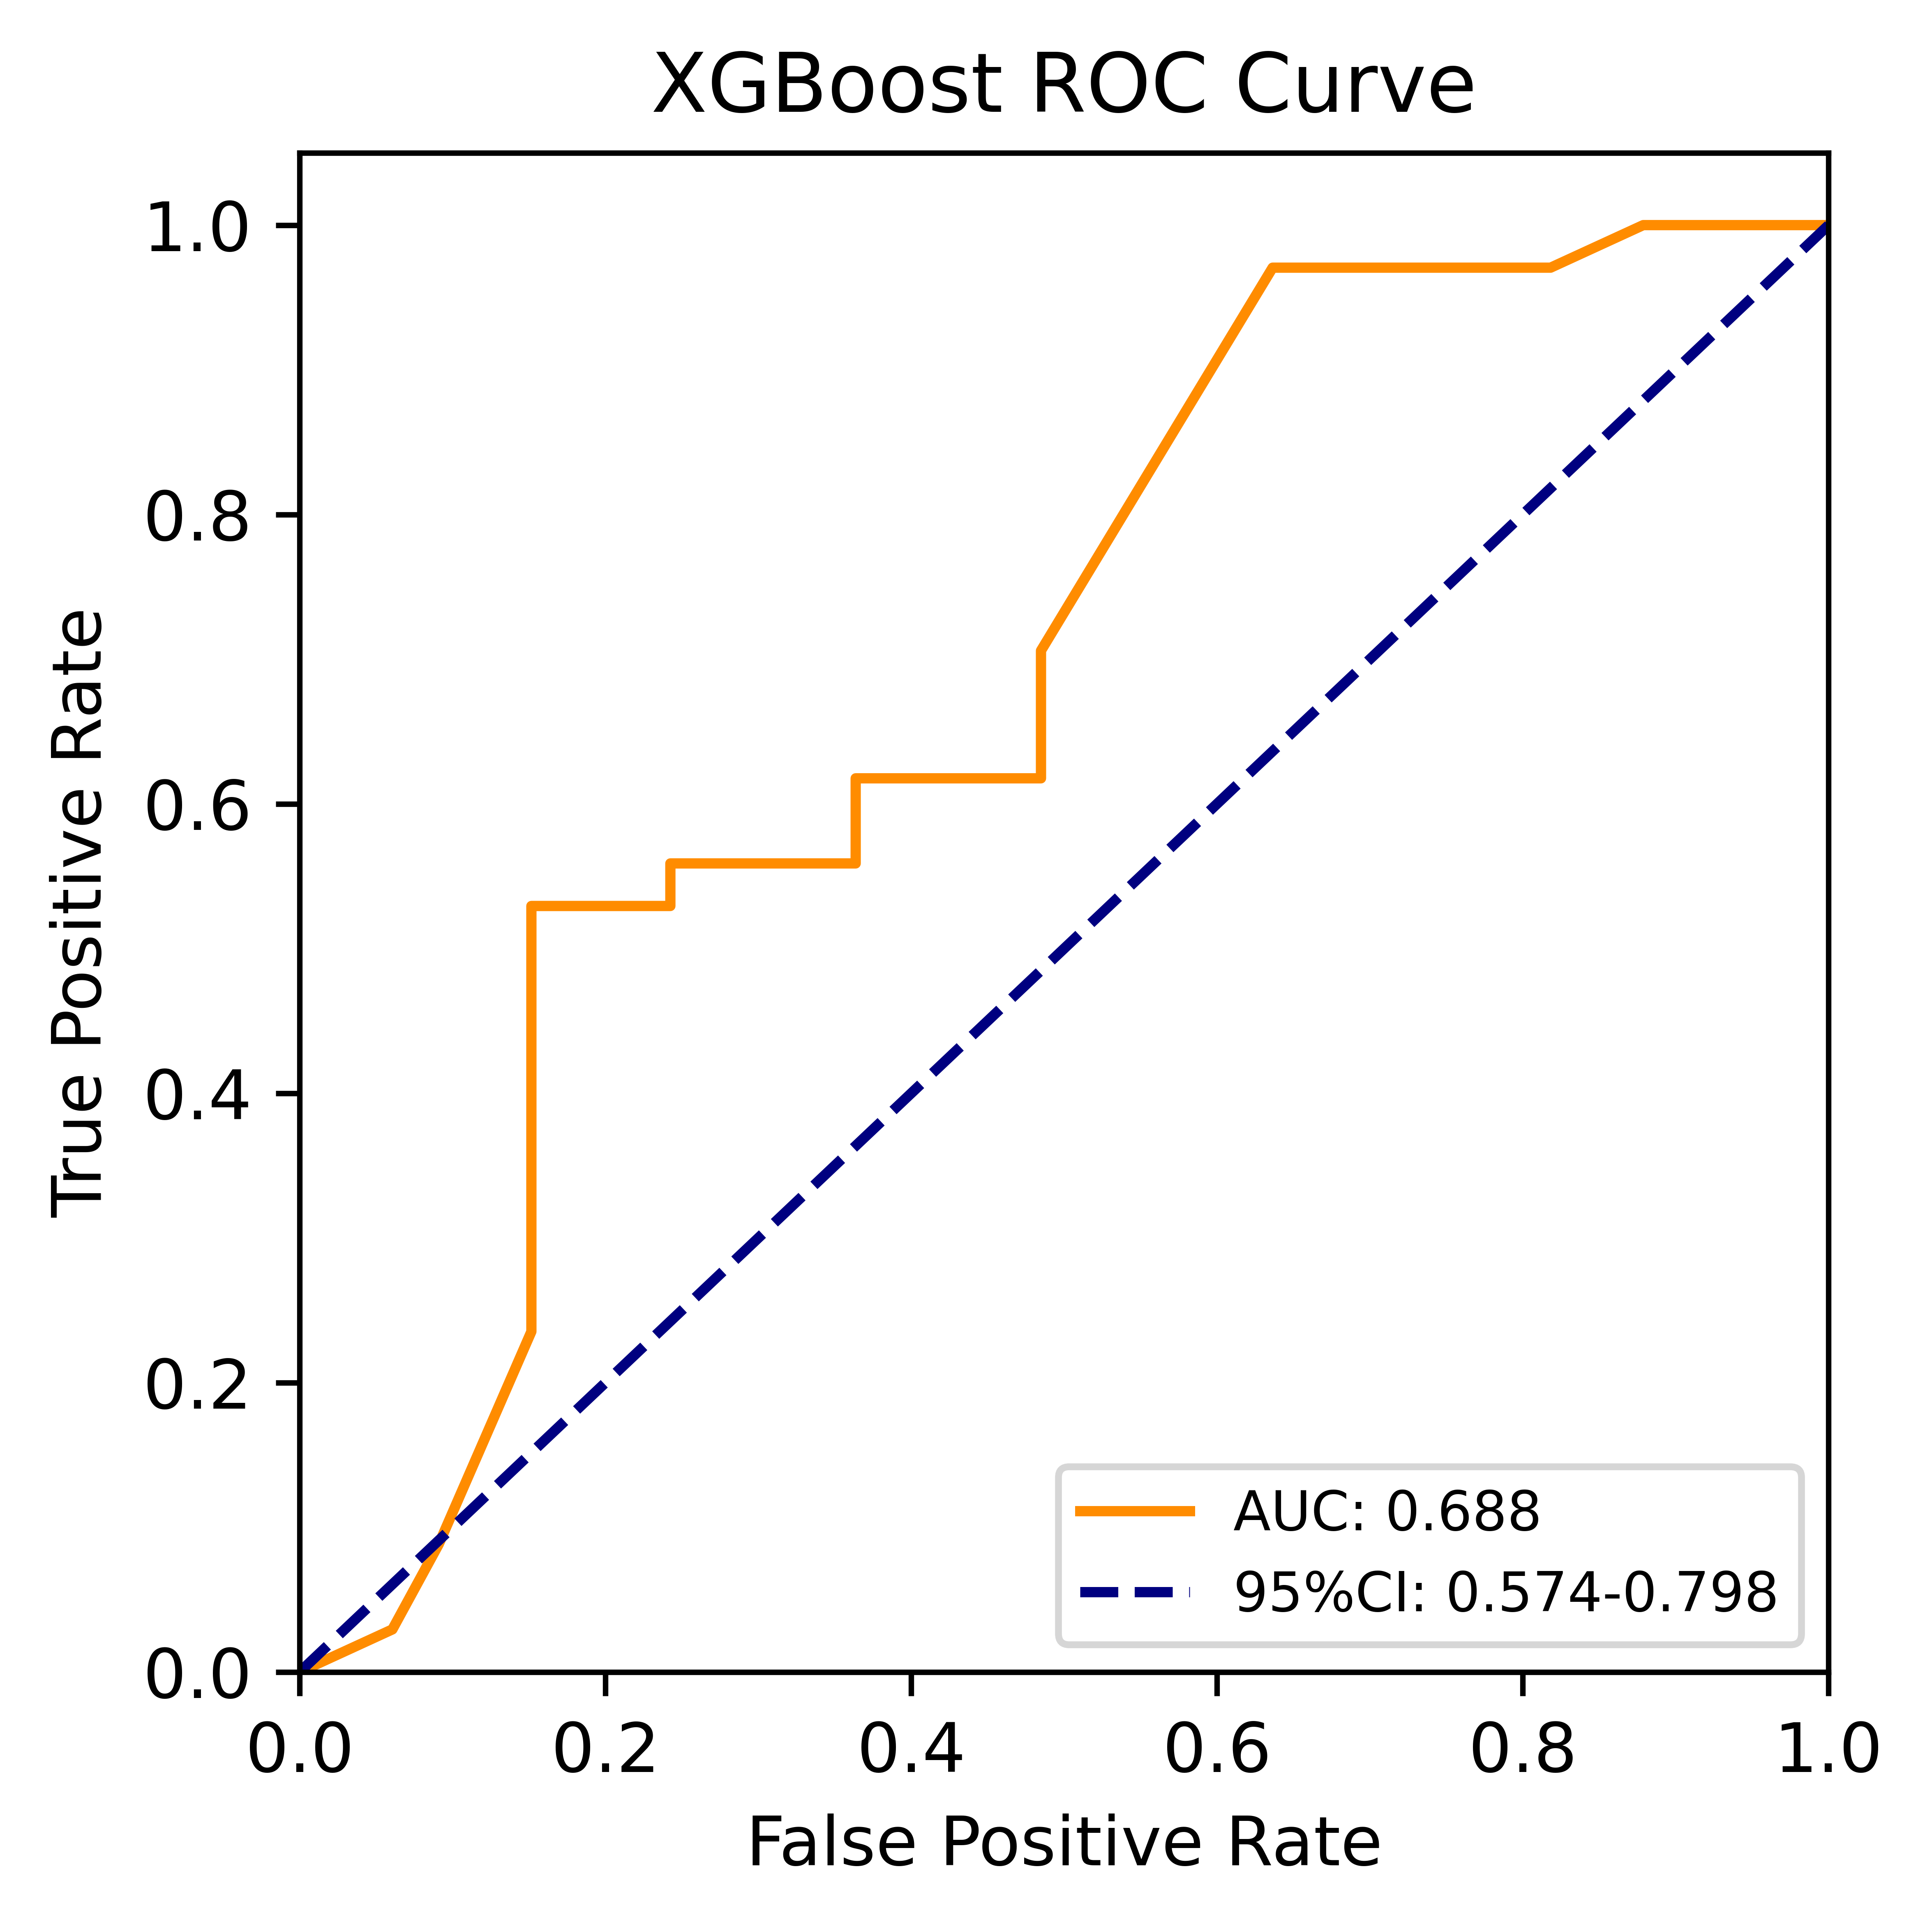

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y_test,xgb_y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(4, 4), dpi=1200)
plt.plot(fpr, tpr, color='darkorange', lw=1.5, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(['AUC: %0.3f' % roc_auc, "95%CI: {:0.3f}-{:0.3}".format(
    confidence_lower, confidence_upper)],loc="lower right", prop={'size': 8},markerfirst=True)
plt.show()

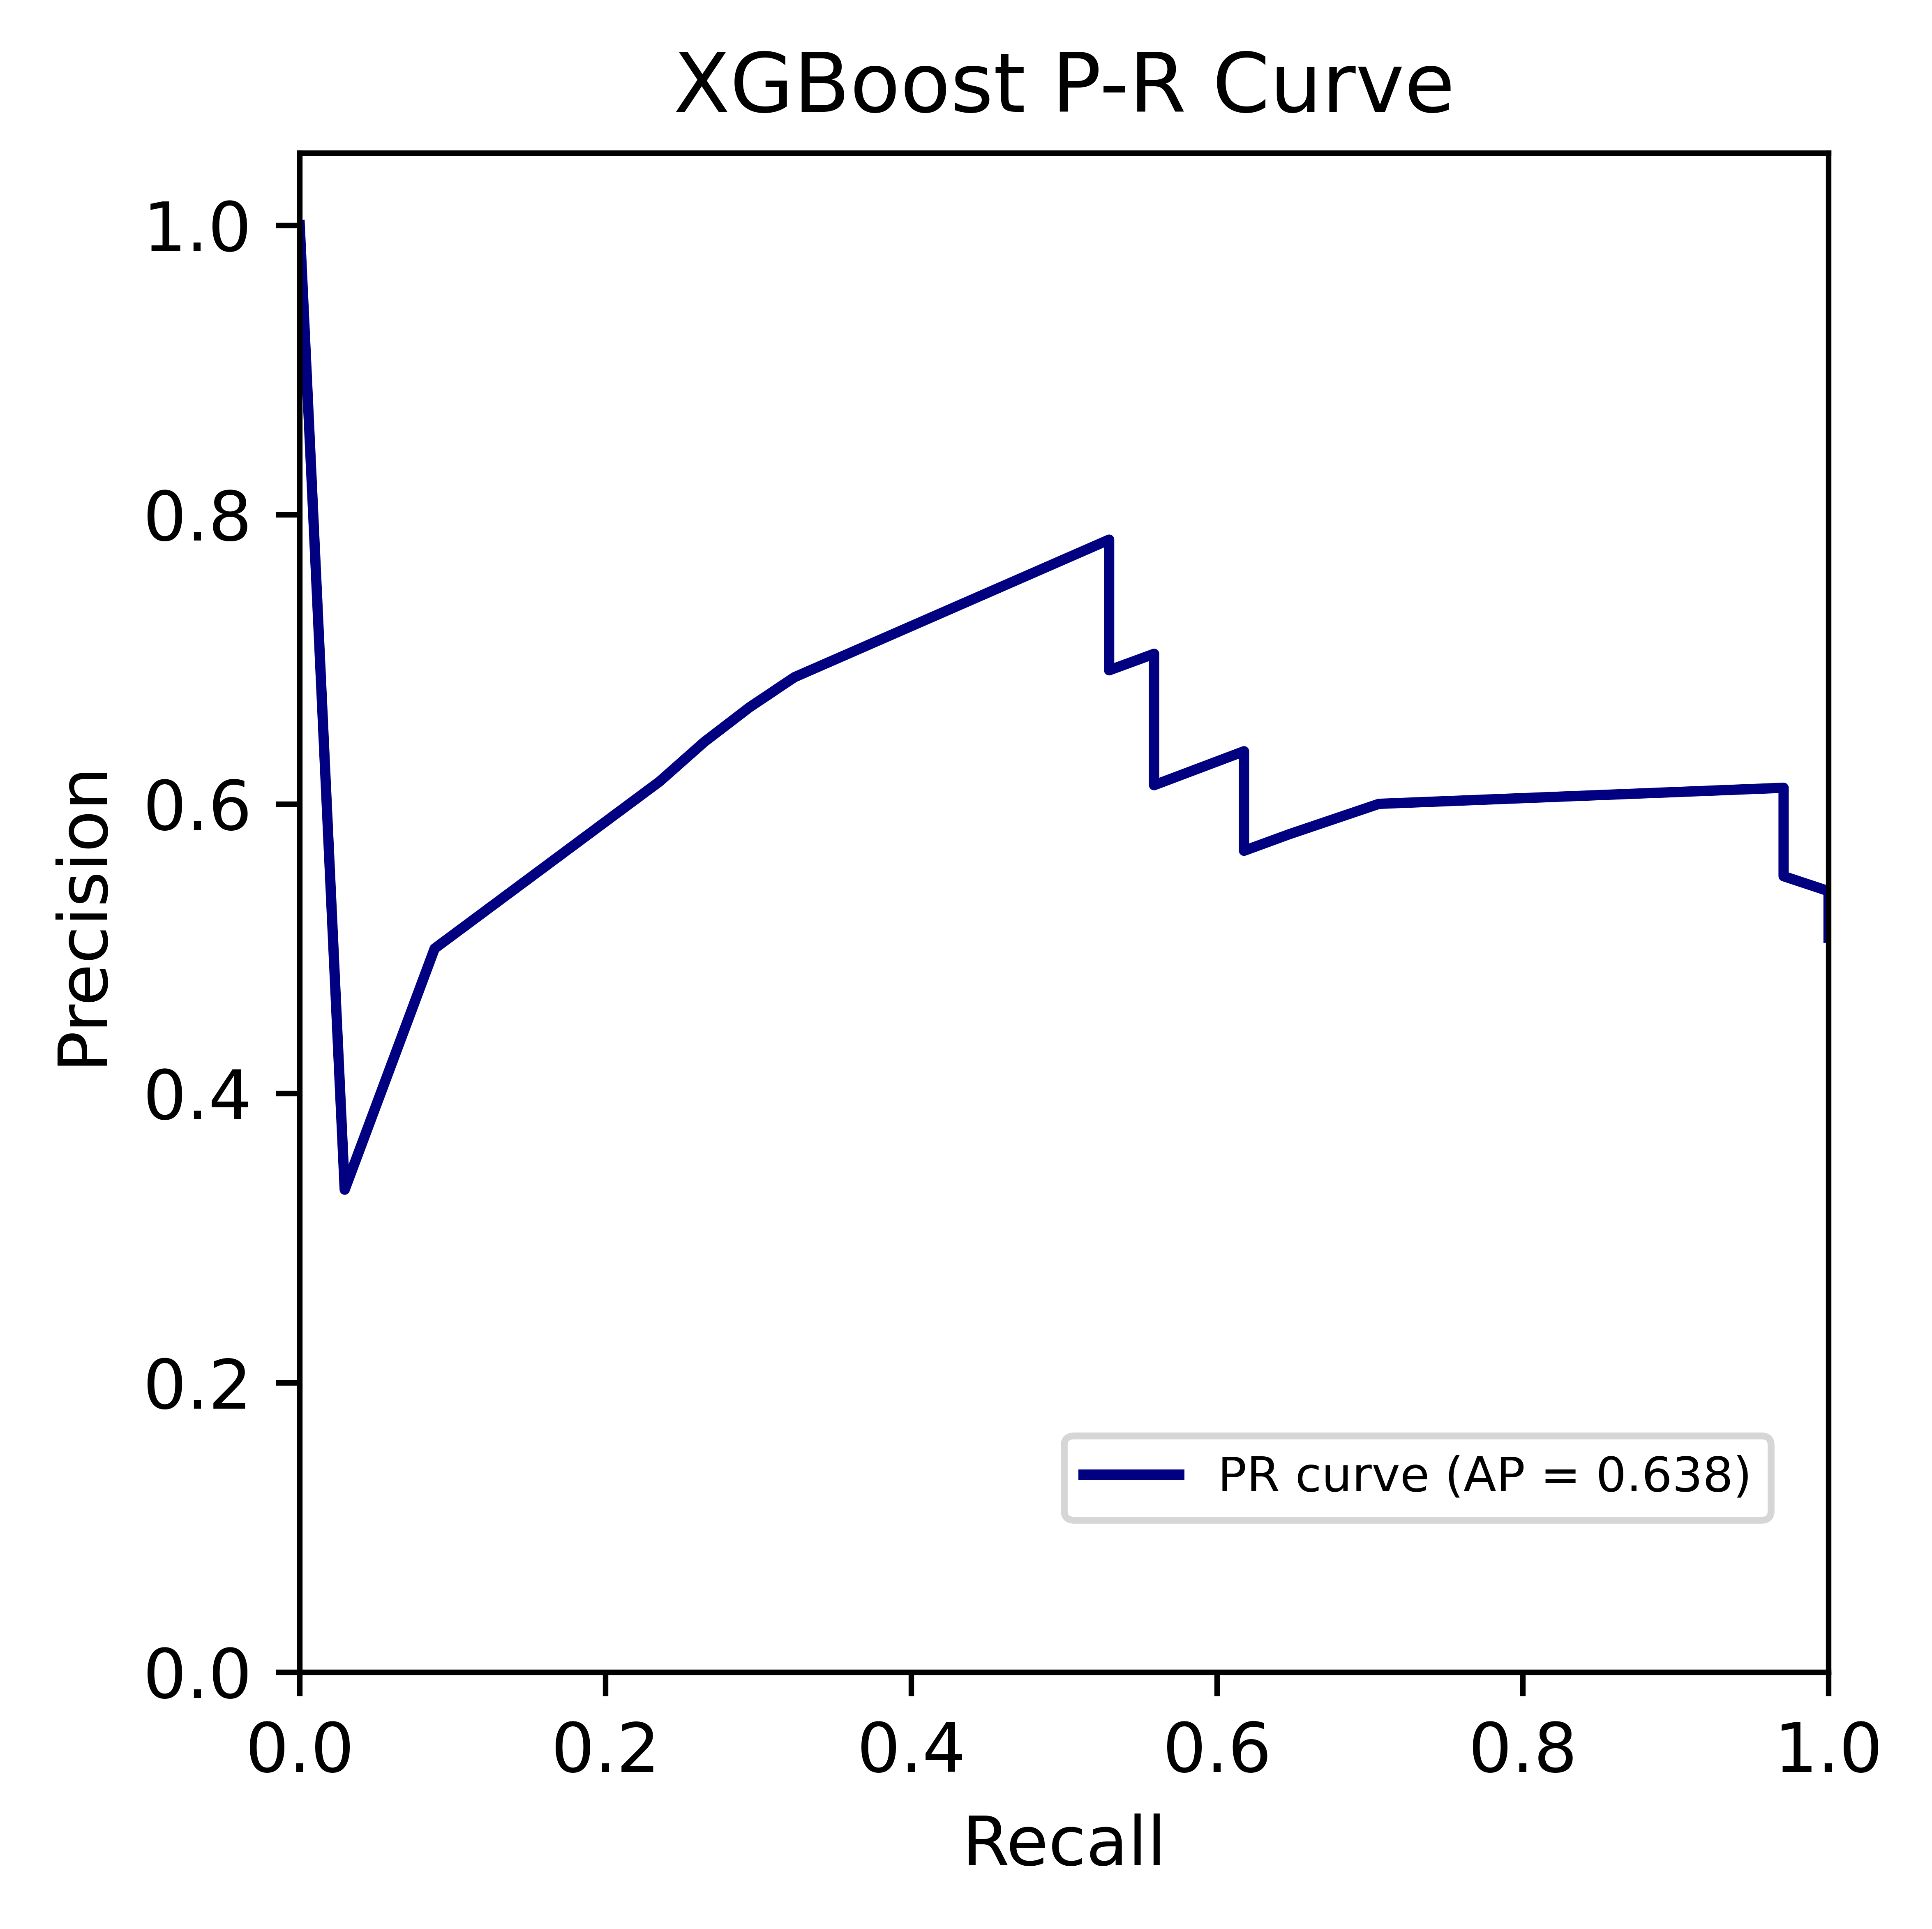

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# y_true为样本实际的类别1为正例0为反例，y_scores为阈值

precision, recall, thresholds = precision_recall_curve(y_test,xgb_y_prob)
AP = average_precision_score(y_test,xgb_y_prob, average='macro', pos_label=1, sample_weight=None)
plt.figure(figsize=(4, 4), dpi=1200)
plt.plot(recall, precision, lw=1.5, color='navy', label='PR curve (AP = %0.3f)' % AP)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('XGBoost P-R Curve')
plt.legend(loc=(0.5,0.1), prop={'size': 7})#标签左下角坐标，字体7号
plt.show()

In [15]:
#计算AP值，PR曲线下面积，PR曲线下面的面积越大，模型的性能越好
from sklearn.metrics import precision_recall_curve, average_precision_score
AP = average_precision_score(y_test,xgb_y_prob, average='macro', pos_label=1, sample_weight=None)
print('AP:', AP)

AP: 0.6376647639376473


In [16]:
##brier评分
from sklearn.metrics import brier_score_loss
print('Brier评分:', brier_score_loss(y_test,xgb_y_prob))

Brier评分: 0.22390043312331023
